In [2]:
import pandas as pd
df = pd.read_pickle("household_cleaned_data.pkl")
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,year,month,day,hour,minute,second
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006,12,16,17,24,0
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006,12,16,17,25,0
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006,12,16,17,26,0
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006,12,16,17,27,0
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006,12,16,17,28,0


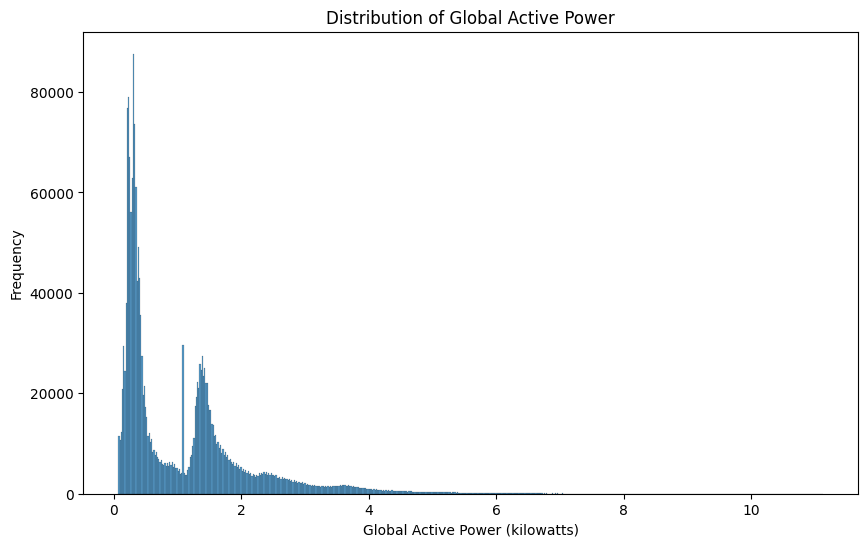

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df["Global_active_power"])
plt.title("Distribution of Global Active Power")
plt.xlabel("Global Active Power (kilowatts)")
plt.ylabel("Frequency")
plt.show()

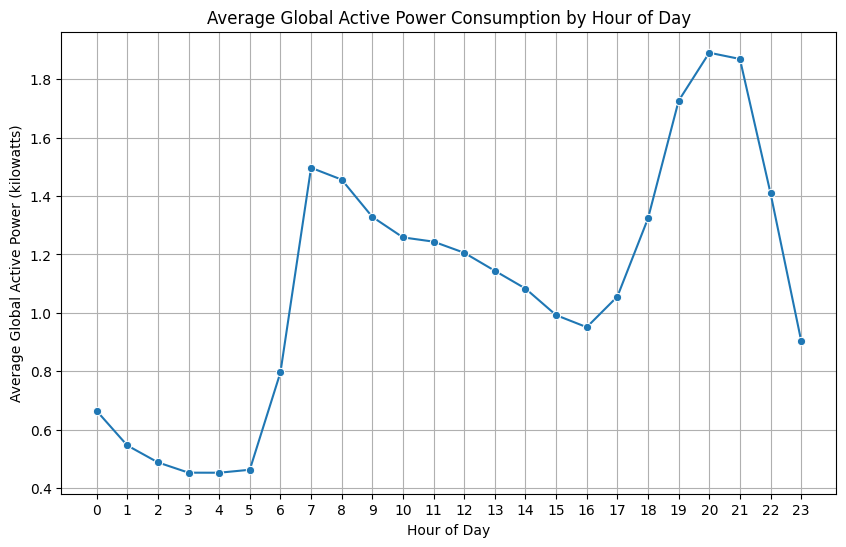

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



# Aggregate average consumption per hour
hourly_consumption = df.groupby('hour')['Global_active_power'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_consumption, x='hour', y='Global_active_power', marker='o')
plt.title('Average Global Active Power Consumption by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Global Active Power (kilowatts)')
plt.xticks(range(0, 24))  # show every hour on x-axis
plt.grid(True)
plt.show()


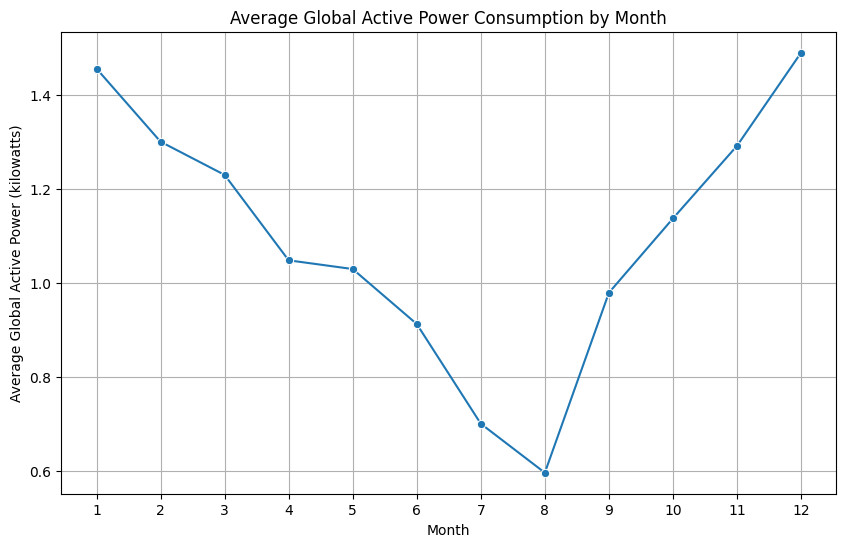

In [5]:
# Aggregate average consumption per month
monthly_consumption = df.groupby('month')['Global_active_power'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_consumption, x='month', y='Global_active_power', marker='o')
plt.title('Average Global Active Power Consumption by Month')
plt.xlabel('Month')
plt.ylabel('Average Global Active Power (kilowatts)')
plt.xticks(range(1, 13))  # show months 1 to 12
plt.grid(True)
plt.show()


detecting outliers

In [13]:
from scipy.stats import zscore
import numpy as np
df1=df
df1['z_power'] = zscore(df1['Global_intensity'])

# Outliers where |z| > 3
outliers_z = df1[np.abs(df1['z_power']) > 3]
print(f"Z-Score Outliers:\n{outliers_z[['Global_intensity', 'z_power']].head()}")


Z-Score Outliers:
    Global_intensity   z_power
0               18.4  3.118369
1               23.0  4.159920
2               23.0  4.159920
3               23.0  4.159920
10              19.6  3.390078


In [9]:
Q1 = df['Voltage'].quantile(0.25)
Q3 = df['Voltage'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = df[(df['Voltage'] < lower_bound) | (df['Voltage'] > upper_bound)]
print(f"IQR Outliers:\n{outliers_iqr[['Voltage']].head()}")


IQR Outliers:
    Voltage
10   232.86
11   232.78
12   232.99
13   232.91
20   232.69


In [14]:
min_val = df["Global_intensity"].min()
max_val = df["Global_intensity"].max()

print(f"Range: {min_val} to {max_val}")


Range: 0.2 to 48.4
